### Import Common Package

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Getting Data

In [2]:
df = pd.read_csv('train1.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.info()
### Some data need encoding since machine learning need a numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Handling Mising Values

In [5]:
df.isna().sum()

### Great no missing values so we dont need to handle any missing value

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Checking Outliers using boxplot

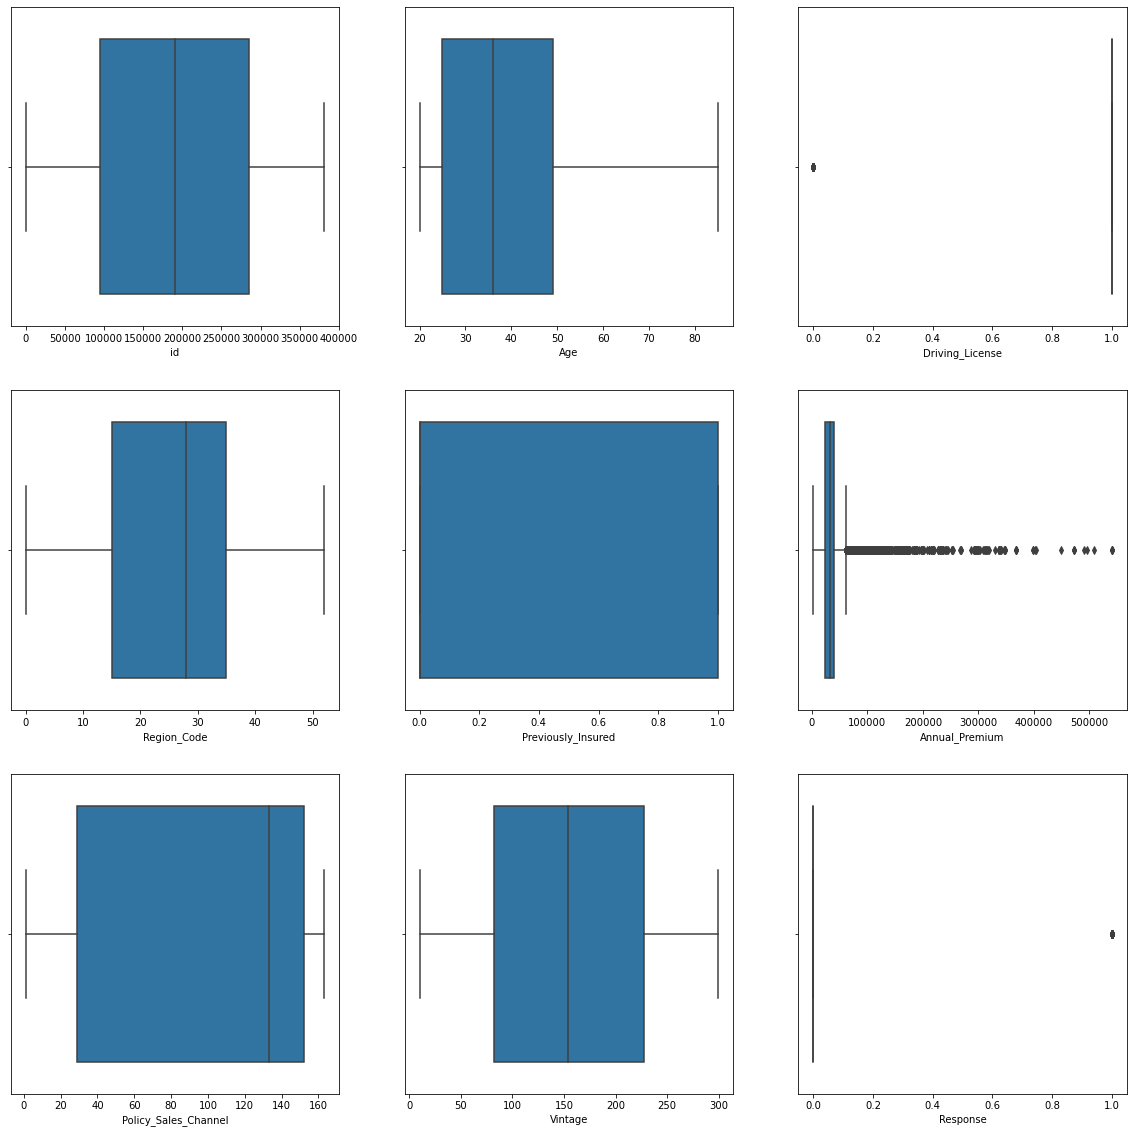

In [6]:
plt.figure(figsize =(20, 20 ))
x = 1 

for column in df.describe().columns:
    plt.subplot(3,3,x)
    sns.boxplot(df[column])
    x+=1
plt.tight_layout
plt.show()

### Annual premium have a lot of outliers, however we going to leave that seems its not affecting much
### for driving license since the value is only 1 and 0 we going to leave that as well

### Data Pre processing

In [7]:
### Droping id column

df.drop(columns = 'id', inplace = True)
df.head()

## Dropping id since we dont need for the analysis

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Encoding Object Column

#### Encoding Gender

In [8]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Encoding Vehicle Damage

In [9]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


#### Encoding Vehicle Age

In [10]:
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years': 2})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


### Checking Correlation

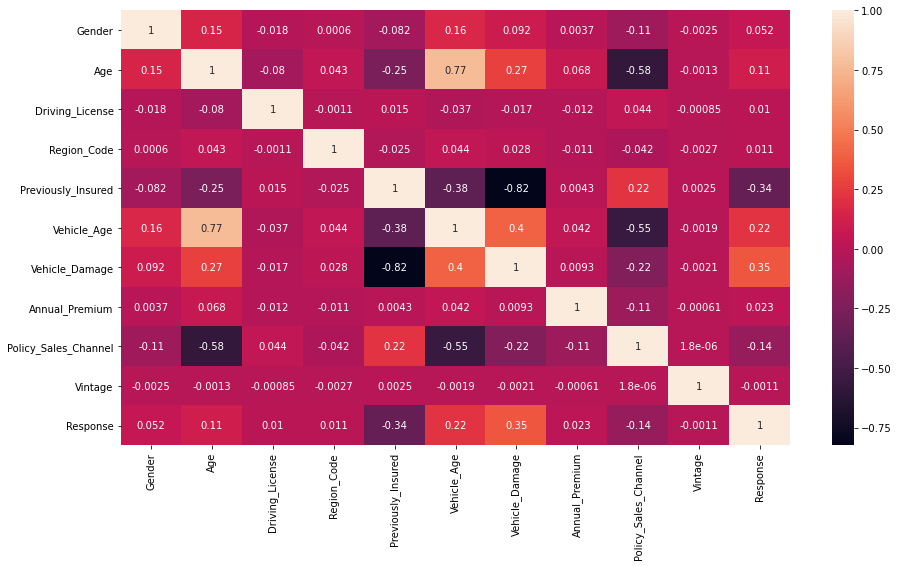

In [11]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [12]:
correlation = df.corr()
correlation['Response'].sort_values(ascending = False)[1:]

Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Gender                  0.052440
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

### Feature Engineering and Feature Selection

In [13]:
X = df.drop(columns = [ 'Driving_License','Response', 'Region_Code', 'Policy_Sales_Channel', 'Gender', 'Vintage'])
y = df['Response']

### Splitting Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size =.80, stratify = y, random_state =42)

### Handling Imbalance Data Using Oversampling

In [15]:
from sklearn.utils import resample

In [16]:
non_response = df[df['Response'] == 0] ## Kelas Majority
response = df[df['Response'] == 1] ## Kelas Minority

In [17]:
response_oversample = resample(response, ## Kelas Minority
                           replace=True,
                           n_samples = len(non_response), ## Jumlah dari Kelas Majority
                           random_state = 42)

In [18]:
df_oversample = pd.concat([non_response, response_oversample])

In [19]:
df_oversample['Response'].value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [20]:
X_train_oversample = df_oversample.drop(columns = [ 'Driving_License','Response', 'Region_Code', 'Policy_Sales_Channel', 'Gender', 'Vintage'])
y_train_oversample = df_oversample['Response']

### Base Model

#### Logistic Regression

In [21]:
logreg =  LogisticRegression()

In [22]:
logreg.fit(X_train_oversample,y_train_oversample)

LogisticRegression()

In [23]:
ypredlog=logreg.predict(X_test)

In [24]:
acc_logreg = accuracy_score(y_test, ypredlog)
recall_logreg = recall_score(y_test, ypredlog)
prec_logreg = precision_score(y_test, ypredlog)
f1_logreg = f1_score(y_test, ypredlog)
print(classification_report(y_test, ypredlog))

              precision    recall  f1-score   support

           0       0.99      0.61      0.76     66880
           1       0.26      0.96      0.40      9342

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.65      0.71     76222



In [25]:
cmlogreg =  confusion_matrix(y_test,ypredlog, labels =[1,0])

In [26]:
df_logreg = pd.DataFrame(data = cmlogreg , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_logreg

,Prediksi 1,Prediksi 0
Aktual 1,8934,408
Aktual 0,25928,40952


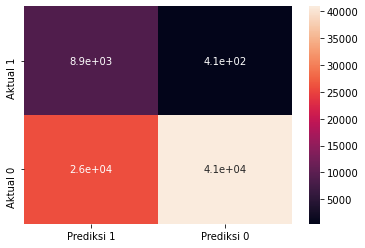

In [27]:
sns.heatmap(df_logreg, annot = True)

#### KNN BASE

In [28]:
KNN = KNeighborsClassifier()

In [29]:
KNN.fit(X_train_oversample,y_train_oversample)

KNeighborsClassifier()

In [30]:
ypredknn = KNN.predict(X_test)

In [31]:
acc_knn = accuracy_score(y_test, ypredknn)
recall_knn = recall_score(y_test, ypredknn)
prec_knn = precision_score(y_test, ypredknn)
f1_knn = f1_score(y_test, ypredknn)
print(classification_report(y_test, ypredknn))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     66880
           1       0.39      0.90      0.54      9342

    accuracy                           0.81     76222
   macro avg       0.69      0.85      0.71     76222
weighted avg       0.91      0.81      0.84     76222



In [32]:
cmknn =  confusion_matrix(y_test,ypredknn, labels =[1,0])

In [33]:
df_knn = pd.DataFrame(data = cmknn , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_knn

,Prediksi 1,Prediksi 0
Aktual 1,8398,944
Aktual 0,13264,53616


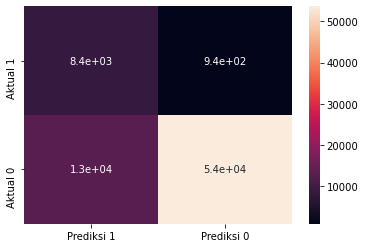

In [34]:
sns.heatmap(df_knn, annot = True)

#### RandomForest Base

In [35]:
rfbase =  RandomForestClassifier()

In [36]:
rfbase.fit(X_train_oversample,y_train_oversample)

RandomForestClassifier()

In [37]:
ypredrf = rfbase.predict(X_test)

In [38]:
acc_rf = accuracy_score(y_test, ypredrf)
recall_rf = recall_score(y_test, ypredrf)
prec_rf = precision_score(y_test, ypredrf)
f1_rf = f1_score(y_test, ypredrf)
print(classification_report(y_test, ypredrf))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     66880
           1       0.65      0.98      0.78      9342

    accuracy                           0.93     76222
   macro avg       0.82      0.95      0.87     76222
weighted avg       0.95      0.93      0.94     76222



In [39]:
cmrf =  confusion_matrix(y_test,ypredrf, labels =[1,0])

In [40]:
df_rf = pd.DataFrame(data = cmrf , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
df_rf

,Prediksi 1,Prediksi 0
Aktual 1,9184,158
Aktual 0,5044,61836


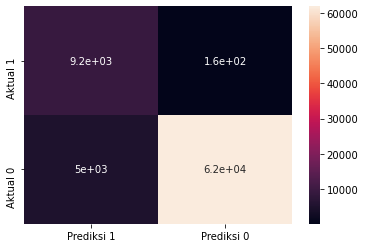

In [41]:
sns.heatmap(df_rf, annot = True)

In [42]:
eva_mat = {
    "LogisticReg": [acc_logreg,prec_logreg,recall_logreg,f1_logreg],
    "KNN": [acc_knn, prec_knn, recall_knn, f1_knn],
    "RandomForest" : [acc_rf, prec_rf, recall_rf, f1_rf]
    }

eva = pd.DataFrame(data = eva_mat, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva

,LogisticReg,KNN,RandomForest
Accuracy,0.654483,0.813597,0.931752
Precision,0.256268,0.387684,0.645488
Recall,0.956326,0.898951,0.983087
F1-Score,0.404217,0.541737,0.779296


- From the base model we can see that RandomForest have the best recall score

### Hyperparameter Tuning

#### LogReg Tuned

In [43]:
logregtuned = LogisticRegression()
paramLR = {'penalty':['l2','elasticnet'],
           'C':[1, 0.5, 0.1, 5, 9],
           "class_weight" : [True, False]}

In [44]:
modelLRtuned = RandomizedSearchCV(estimator=logregtuned, param_distributions=paramLR, n_jobs=-1, cv=5, verbose=1, scoring='recall')

In [45]:
modelLRtuned.fit(X_train_oversample,y_train_oversample)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   38.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 0.5, 0.1, 5, 9],
                                        'class_weight': [True, False],
                                        'penalty': ['l2', 'elasticnet']},
                   scoring='recall', verbose=1)

In [46]:
logreg_tuned = modelLRtuned.best_estimator_

In [47]:
ytunedlogreg = logreg_tuned.predict(X_test)

In [48]:
cmlogregtuned=confusion_matrix(y_test,ytunedlogreg,labels=[1,0])
cmlogregtuned

array([[ 8934,   408],
       [25928, 40952]])

In [49]:
acclrtuned = accuracy_score(y_test, ytunedlogreg)
preclrtuned = precision_score(y_test, ytunedlogreg)
reclrtuned = recall_score(y_test, ytunedlogreg)
f1lrtuned = f1_score(y_test,ytunedlogreg)

print(classification_report(y_test, ytunedlogreg))

              precision    recall  f1-score   support

           0       0.99      0.61      0.76     66880
           1       0.26      0.96      0.40      9342

    accuracy                           0.65     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.90      0.65      0.71     76222



In [50]:
dflogregtuned = pd.DataFrame(data = cmlogregtuned , index = ["Aktual 1","Aktual 0"], columns = ["Prediksi 1", "Prediksi 0"])
dflogregtuned

,Prediksi 1,Prediksi 0
Aktual 1,8934,408
Aktual 0,25928,40952


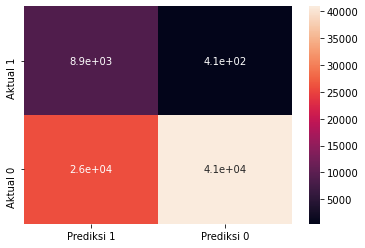

In [51]:
sns.heatmap(dflogregtuned, annot = True)

#### KNN TUNING

In [52]:
KNNtuning = KNeighborsClassifier()
param_KNN = {'n_neighbors':[5,7,9],
               'weights':['uniform','distance'],
               'p':[2, 1]}

In [53]:
model_KNN_tuned = RandomizedSearchCV(estimator = KNNtuning, param_distributions= param_KNN, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [54]:
model_KNN_tuned.fit(X_train_oversample, y_train_oversample)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.5min finished


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 7, 9], 'p': [2, 1],
                                        'weights': ['uniform', 'distance']},
                   scoring='recall', verbose=1)

In [55]:
KNNtuned = model_KNN_tuned.best_estimator_

In [56]:
ytunedKNN = KNNtuned.predict(X_test)

In [57]:
cmknntuned = confusion_matrix(y_test, ytunedKNN, labels =[1,0])
cmknntuned

array([[ 8490,   852],
       [ 2826, 64054]])

In [58]:
accKNNtuned = accuracy_score(y_test, ytunedKNN)
precKNNtuned = precision_score(y_test, ytunedKNN)
recKNNtuned = recall_score(y_test, ytunedKNN)
f1KNNtuned = f1_score(y_test,ytunedKNN)

print(classification_report(y_test, ytunedKNN))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     66880
           1       0.75      0.91      0.82      9342

    accuracy                           0.95     76222
   macro avg       0.87      0.93      0.90     76222
weighted avg       0.96      0.95      0.95     76222



In [59]:
dfknntuned = pd.DataFrame(data = cmknntuned,index=['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
dfknntuned

,Prediksi 1,Prediksi 0
Aktual 1,8490,852
Aktual 0,2826,64054


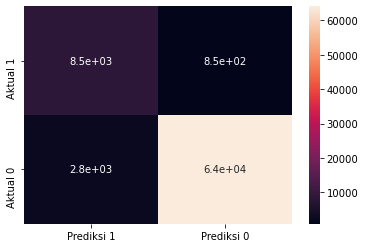

In [60]:
sns.heatmap(dfknntuned, annot = True)

In [61]:
RFtuning = RandomForestClassifier()
paramRF = {
    "n_estimators":[100,500,1000],
    "max_depth": [None, 4,6,8],
    "min_samples_leaf": [1,0.06,3,5],
    "min_samples_split" : [2,9,15,25],
    "max_features" : ['auto','sqrt', 'log2'],
}

In [62]:
modelrftuned = RandomizedSearchCV(estimator = RFtuning, param_distributions= paramRF, cv = 3, n_jobs = -1 , verbose = 1, scoring = 'recall')

In [63]:
modelrftuned.fit(X_train_oversample, y_train_oversample)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 67.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 4, 6, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 0.06, 3, 5],
                                        'min_samples_split': [2, 9, 15, 25],
                                        'n_estimators': [100, 500, 1000]},
                   scoring='recall', verbose=1)

In [67]:
RFtuned = modelrftuned.best_estimator_

In [68]:
ytunedRF = RFtuned.predict(X_test)

In [69]:
cmrftuned = confusion_matrix(y_test, ytunedRF, labels =[1,0])
cmrftuned

array([[ 9016,   326],
       [ 9602, 57278]])

In [70]:
accRFtuned = accuracy_score(y_test, ytunedRF)
precRFtuned = precision_score(y_test, ytunedRF)
recRFtuned = recall_score(y_test, ytunedRF)
f1RFtuned = f1_score(y_test,ytunedRF)

print(classification_report(y_test, ytunedRF))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     66880
           1       0.48      0.97      0.64      9342

    accuracy                           0.87     76222
   macro avg       0.74      0.91      0.78     76222
weighted avg       0.93      0.87      0.89     76222



In [74]:
dfRFtuned = pd.DataFrame(data = cmrftuned,index=['Aktual 1', 'Aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
dfRFtuned

,Prediksi 1,Prediksi 0
Aktual 1,9016,326
Aktual 0,9602,57278


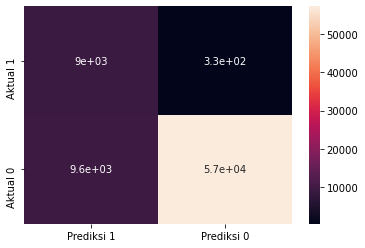

In [76]:
sns.heatmap(dfRFtuned, annot = True)

In [73]:
eva_mat_tuned = {
    "LogisticReg": [acclrtuned, preclrtuned, reclrtuned, f1lrtuned],
    "KNN": [accKNNtuned, precKNNtuned, recKNNtuned, f1KNNtuned],
    "RandomForest" : [accRFtuned, precRFtuned, recRFtuned, f1RFtuned]
    }

eva_tuned = pd.DataFrame(data = eva_mat_tuned, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva_tuned

,LogisticReg,KNN,RandomForest
Accuracy,0.654483,0.951746,0.869749
Precision,0.256268,0.750265,0.484263
Recall,0.956326,0.908799,0.965104
F1-Score,0.404217,0.821958,0.644921


- Since we are focusing on lowering false negative, we choose recall as our confusion matrix scoring. 
- We try to predict who actually really interested with the product in order for the company to not wasting time to offer the insurance to a customer who not even interested.
- Looking from the table, random forest have the best recall score, thus we choose random forest as our machine learning model

In [77]:
import joblib

In [78]:
joblib.dump(modelrftuned, 'Cross Sell Insurance Predictor')

['Cross Sell Insurance Predictor']